# Analysis of Global Nucleosome Positioning in *Arabidopsis thaliana* with DANPOS
**Author**: Emma Tung Corcoran </br>
**Date Last Modified**: July 28, 2021 </br>
**Description**: Micrococcal nuclease digestion with deep sequencing (MNase-seq) is a molecular biology technique that measures nucleosome occupancy across the whole genome. After processing paired-end MNase-seq data using the workflow here: https://github.com/etc27/MNaseseq-workflow/blob/main/README.md, a table (result/pooled/A….positions.xls) is generated that contains the following information:
<br> chr: chromosome name
<br> start: the start point of a position
<br> end: the end point of a position
<br> smt_pos: the occupancy summit point in a position
<br> smt_value: the occupancy value at smt_pos
<br> fuzziness_score: the fuzziness score of a position
<br> This code analyzes nucleosome fuzziness scores across samples.

In [1]:
#Load required dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as st

In [2]:
#Set path to save plot
save_path = "/Users/emmacorcoran/Documents/Jupyter Code/2021_05_24_MNase"

## Load and Clean Data
First, I load and clean the data generated using DANPOS.

In [3]:
#Load data matrices
#Profile values at each gene
base_path = "/Users/emmacorcoran/Documents/NGS Data/MNase_2021_05_24/danpos/all/"
filename = "3_aligned_sequences_aligned_bam_merged_Col.merge.140-160.Fnor.smooth.positions.ref_adjust.xls"
path_to_file = os.path.join(base_path, filename)
Col_1_data = pd.read_csv(path_to_file, sep='\t')

filename = "3_aligned_sequences_aligned_bam_merged_68-18D.merge.140-160.Fnor.smooth.positions.ref_adjust.xls"
path_to_file = os.path.join(base_path, filename)
rH4_1_data = pd.read_csv(path_to_file, sep='\t')

filename = "3_aligned_sequences_aligned_bam_merged_13-6.merge.140-160.Fnor.smooth.positions.ref_adjust.xls"
path_to_file = os.path.join(base_path, filename)
R17A_1_data = pd.read_csv(path_to_file, sep='\t')

filename = "3_aligned_sequences_aligned_bam_merged_arid5.merge.140-160.Fnor.smooth.positions.ref_adjust.xls"
path_to_file = os.path.join(base_path, filename)
arid5_1_data = pd.read_csv(path_to_file, sep='\t')

In [4]:
#Load data matrices
#Profile values at each gene
base_path = "/Users/emmacorcoran/Documents/NGS Data/MNase_2021_05_24/danpos/Colv13-6/"
filename = "3_aligned_sequences_aligned_bam_merged_Col.merge.140-160-3_aligned_sequences_aligned_bam_merged_13-6.merge.140-160.positions.integrative.xls"
path_to_file = os.path.join(base_path, filename)
ColvR17A_1_data = pd.read_csv(path_to_file, sep='\t')

base_path = "/Users/emmacorcoran/Documents/NGS Data/MNase_2021_05_24/danpos/Colv68-18D/"
filename = "3_aligned_sequences_aligned_bam_merged_Col.merge.140-160-3_aligned_sequences_aligned_bam_merged_68-18D.merge.140-160.positions.integrative.xls"
path_to_file = os.path.join(base_path, filename)
ColvrH4_1_data = pd.read_csv(path_to_file, sep='\t')

base_path = "/Users/emmacorcoran/Documents/NGS Data/MNase_2021_05_24/danpos/Colvarid5/"
filename = "3_aligned_sequences_aligned_bam_merged_Col.merge.140-160-3_aligned_sequences_aligned_bam_merged_arid5.merge.140-160.positions.integrative.xls"
path_to_file = os.path.join(base_path, filename)
Colvarid5_data = pd.read_csv(path_to_file, sep='\t')

In [5]:
R17A_1_data.head()

,chr,start,end,smt_pos,smt_value,smt_log10pval,fuzziness_score,fuzziness_log10pval
0,Chr1,42,182,112,137.780349,-1.215964e-16,51.794278,-1.018900
1,Chr1,232,372,302,386.673884,-1.386814e+01,52.620593,-0.940968
2,Chr1,512,652,582,302.227863,-2.668953e+00,53.578642,-0.850543
3,Chr1,622,762,692,133.335822,-9.288096e-18,68.876742,0.000000
4,Chr1,752,892,822,377.784829,-1.226871e+01,49.430584,-1.306940


In [6]:
ColvrH4_1_data.head()

,chr,start,end,center,control_smt_loca,treat_smt_loca,diff_smt_loca,treat2control_dis,control_smt_val,treat_smt_val,...,control_point_val,treat_point_val,point_log2FC,point_diff_log10Pval,point_diff_FDR,control_fuzziness_score,treat_fuzziness_score,fuzziness_log2FC,fuzziness_diff_log10pval,fuzziness_diff_FDR
0,Chr1,47,247,147,152,142,140,10,115.815013,123.918068,...,115.815013,123.918068,0.097564,-0.628519,0.881247,60.689829,49.607166,-0.290906,-16.946560,0.077135
1,Chr1,282,482,382,382,382,380,0,397.080044,333.029807,...,397.080044,333.029807,-0.253779,-3.529878,0.580896,53.510582,58.179428,0.120685,-9.915874,0.179258
2,Chr1,437,637,537,562,512,530,50,339.172538,383.371523,...,297.810033,364.009324,0.289583,-4.038885,0.554321,54.683131,55.157526,0.012462,-0.577479,0.882918
3,Chr1,584,784,684,677,692,680,15,165.450018,348.519566,...,173.722519,340.774687,0.972033,-28.589517,0.122430,65.701426,57.303300,-0.197306,-20.532070,0.051730
4,Chr1,727,927,827,822,832,820,10,388.807543,425.968358,...,388.807543,383.371523,-0.020313,-0.404899,0.936069,53.561973,54.791812,0.032751,-1.351573,0.697476


In [7]:
ColvR17A_1_data

,chr,start,end,center,control_smt_loca,treat_smt_loca,diff_smt_loca,treat2control_dis,control_smt_val,treat_smt_val,...,control_point_val,treat_point_val,point_log2FC,point_diff_log10Pval,point_diff_FDR,control_fuzziness_score,treat_fuzziness_score,fuzziness_log2FC,fuzziness_diff_log10pval,fuzziness_diff_FDR
0,Chr1,27,227,127,112,142,120,30,130.856509,121.627086,...,122.414154,114.025393,-0.102415,-0.673681,0.858599,51.801633,49.610665,-0.062347,-1.330368,0.706000
1,Chr1,242,442,342,302,382,340,80,367.242462,326.872794,...,354.578929,319.271101,-0.151325,-1.588003,0.734498,52.622390,58.179703,0.144839,-13.454490,0.128949
2,Chr1,447,647,547,582,512,540,70,287.040085,376.283798,...,236.385952,372.482951,0.656030,-15.809915,0.224887,53.580788,55.157973,0.041854,-1.693573,0.649841
3,Chr1,592,792,692,692,692,690,0,126.635332,342.076180,...,126.635332,342.076180,1.433638,-55.931470,0.027745,68.875058,57.303626,-0.265355,-35.721640,0.018720
4,Chr1,727,927,827,822,832,820,10,358.800106,418.093109,...,358.800106,376.283798,0.068641,-0.757626,0.841217,49.433929,54.792287,0.148471,-12.601750,0.142821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671460,ChrM,365872,366072,365972,365972,365972,365970,0,1392.988648,832.385371,...,1392.988648,832.385371,-0.742860,-69.617067,0.016547,55.705735,59.464711,0.094208,-18.185250,0.080478
671461,ChrM,366022,366222,366122,366132,366112,366120,20,1241.026250,896.999760,...,1215.699184,813.381139,-0.579783,-38.970149,0.061842,56.807738,58.265027,0.036543,-3.462345,0.466823
671462,ChrM,366232,366432,366332,366332,366332,366330,0,1570.278113,771.571828,...,1570.278113,771.571828,-1.025148,-139.641605,0.002173,53.566546,54.996635,0.038011,-3.367579,0.473675
671463,ChrM,366472,366672,366572,366532,366612,366570,80,1232.583895,866.592989,...,1042.630897,566.326120,-0.880524,-71.174519,0.016045,58.253543,57.689713,-0.014032,-0.993414,0.768929


## Plot average over all positions

#### Clean data and add relevant statistics

In [8]:
#Remove ChrM and ChrC reads
def remove_MC(df):
    df = df[df.chr != "ChrM"]
    df = df[df.chr != "ChrC"]
    return df

In [9]:
Col_1_data = remove_MC(Col_1_data)
rH4_1_data = remove_MC(rH4_1_data)
R17A_1_data = remove_MC(R17A_1_data)
arid5_1_data = remove_MC(arid5_1_data)

In [10]:
#Add dyad data
def add_center(df):
    col = Col_1_data.loc[: , "start":"end"]
    df['center'] = col.mean(axis=1)
    return df

In [11]:
Col_1_data = add_center(Col_1_data)
rH4_1_data = add_center(rH4_1_data)
R17A_1_data = add_center(R17A_1_data)
arid5_1_data = add_center(arid5_1_data)

### Subsection for protein-coding genes

In [12]:
# Read in protein-coding gene positions
base_path = "/Users/emmacorcoran/Desktop/annotations"
filename = "Araport_proteincoding_red.bed"
path_to_file = os.path.join(base_path, filename)
proteincoding_list = pd.read_csv(path_to_file, sep='\t', names=['chr','start','end','Gene','.','strand'])
proteincoding_list.head()

,chr,start,end,Gene,.,strand
0,Chr1,3630,5899,AT1G01010,.,+
1,Chr1,6787,8737,AT1G01020,.,-
2,Chr1,11648,13714,AT1G01030,.,-
3,Chr1,23120,31227,AT1G01040,.,+
4,Chr1,31169,33171,AT1G01050,.,-


In [13]:
# Make interval array of protein coding genes for each chromosome
pc_intervals = proteincoding_list[['start','end']]
pc_tuple = pc_intervals.to_records(index=False)
pc_array = pd.arrays.IntervalArray.from_tuples(pc_tuple)

In [163]:
# Make intervals for protein coding genes
pc_chr1 = proteincoding_list.loc[proteincoding_list['chr'] == 'Chr1']
pc_chr2 = proteincoding_list.loc[proteincoding_list['chr'] == 'Chr2']
pc_chr3 = proteincoding_list.loc[proteincoding_list['chr'] == 'Chr3']
pc_chr4 = proteincoding_list.loc[proteincoding_list['chr'] == 'Chr4']
pc_chr5 = proteincoding_list.loc[proteincoding_list['chr'] == 'Chr5']

In [225]:
# Separate sample by chromosomes, test overlap for each chromosome, keep rows with overlap with genes (and annotate with gene),
# and return final data frame
def overlap_genes_filter(df, pc_chr1, pc_chr2, pc_chr3, pc_chr4, pc_chr5):
    toreturn = pd.DataFrame(columns=df.columns)
    toreturn['Gene'] = "NA"
    
    # Iterate through the five chromosomes
    for chr_num in (number+1 for number in range(5)):
        if chr_num==1:
            pc_chr = pc_chr1
        if chr_num==2:
            pc_chr = pc_chr2
        if chr_num==3:
            pc_chr = pc_chr3
        if chr_num==4:
            pc_chr = pc_chr4
        if chr_num==5:
            pc_chr = pc_chr5
        
        # Make interval objects for protein-coding genes on correct chromosome
        pc_intervals = pc_chr[['start','end']]
        pc_intervals = pc_intervals.to_records(index=False)
        pc_intervals = pd.arrays.IntervalArray.from_tuples(pc_intervals)
        
        # Make interval objects for nucleosome intervals on each chromosome
        chr_df = df.loc[df['chr'] == 'Chr'+str(chr_num)]
        chr_intervals = chr_df[['start','end']]
        chr_intervals = chr_intervals.to_records(index=False)
        chr_intervals = pd.arrays.IntervalArray.from_tuples(chr_intervals)
    
        # Check if each nucleosome position overlaps with any of the protein-coding genes, save nucleosomes that overlap with genes and the genes they overlap with
        genelist = []
        idx = []
        
        for i in range(len(chr_intervals)):
            overlaps = pc_intervals.overlaps(chr_intervals[i])
            if overlaps.sum() > 0:
                idx.append(i)
                genelist.append(pc_chr.iloc[np.argmax(overlaps)].Gene)

        toadd = chr_df.iloc[idx]
        toadd.loc[:,'Gene'] = genelist
        toreturn = pd.concat([toreturn, toadd], ignore_index=True)
    return toreturn

In [226]:
Col_1_overlap = overlap_genes_filter(Col_1_data, pc_chr1, pc_chr2, pc_chr3, pc_chr4, pc_chr5)

In [230]:
Col_1_overlap.head()

,chr,start,end,smt_pos,smt_value,smt_log10pval,fuzziness_score,fuzziness_log10pval,center,Gene
0,Chr1,3652,3792,3722,256.125163,-3.233715e-01,46.491504,-1.755859,3722.0,AT1G01010
1,Chr1,3762,3902,3832,152.074316,-6.905222e-13,60.491480,-0.403091,3832.0,AT1G01010
2,Chr1,3972,4112,4042,232.113429,-3.247810e-02,45.874800,-1.867312,4042.0,AT1G01010
3,Chr1,4142,4282,4212,624.305086,-8.380245e+01,37.686169,-4.246448,4212.0,AT1G01010
4,Chr1,4352,4492,4422,196.095828,-2.589737e-05,67.614715,0.000000,4422.0,AT1G01010


In [229]:
rH4_1_overlap = overlap_genes_filter(rH4_1_data, pc_chr1, pc_chr2, pc_chr3, pc_chr4, pc_chr5)
R17A_1_overlap = overlap_genes_filter(R17A_1_data, pc_chr1, pc_chr2, pc_chr3, pc_chr4, pc_chr5)
arid5_1_overlap = overlap_genes_filter(arid5_1_data, pc_chr1, pc_chr2, pc_chr3, pc_chr4, pc_chr5)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Plot relevant statistics

In [231]:
#Save statistics about samples
def statistics(df, sample):
    #Number of nucleosomes
    num_nucs = df.shape[0]
    #Average smt_value
    avg_smt_val = df["smt_value"].mean()
    #StError smt_value
    sem_smt_val = df["smt_value"].sem()
    #Average fuzziness score
    avg_fuzz = df["fuzziness_score"].mean()
    #StError fuzziness score
    sem_fuzz = df["fuzziness_score"].sem()
    #Make data frame to return
    toreturn = pd.DataFrame(np.array([[sample, num_nucs, avg_smt_val, sem_smt_val, avg_fuzz, sem_fuzz]]),
                   columns=['sample', 'number_nucs', 'avg_smt_val', 'sem_smt_val', 'avg_fuzziness', 'sem_fuzziness'])
    return toreturn

In [232]:
Col_1_stats = statistics(Col_1_data, "Col-1")
rH4_1_stats = statistics(rH4_1_data, "rH4-1")
R17A_1_stats = statistics(R17A_1_data, "R17A-1")
arid5_1_stats = statistics(arid5_1_data, "arid5-1")

In [233]:
stats_df = Col_1_stats.append(rH4_1_stats, ignore_index=True)
stats_df = stats_df.append(R17A_1_stats, ignore_index=True)
stats_df = stats_df.append(arid5_1_stats, ignore_index=True)
stats_df

,sample,number_nucs,avg_smt_val,sem_smt_val,avg_fuzziness,sem_fuzziness
0,Col-1,665188,354.9156306455229,0.624158203645482,56.05424550383906,0.010843050427557852
1,rH4-1,666646,343.4655298144822,0.6210066328012153,56.030834699209706,0.008543707748841738
2,R17A-1,662922,343.7909746114333,0.7418078797372297,56.34506319713413,0.010402185864648496
3,arid5-1,659734,338.08517066736636,0.5722047913760285,56.589947336812244,0.00876179276595779


### All Genes

In [234]:
#Make boxplots of data
Col_1_data = Col_1_data.assign(Sample="Col-1")
rH4_1_data = rH4_1_data.assign(Sample="rH4-1")
R17A_1_data = R17A_1_data.assign(Sample="R17A-1")
arid5_1_data = arid5_1_data.assign(Sample="arid5-1")

In [235]:
cdf = pd.concat([Col_1_data, rH4_1_data, R17A_1_data, arid5_1_data])
cdf.head()

,chr,start,end,smt_pos,smt_value,smt_log10pval,fuzziness_score,fuzziness_log10pval,center,Sample
0,Chr1,72,212,142,128.062582,-3.154227e-19,49.601150,-1.275372,142.0,Col-1
1,Chr1,312,452,382,344.168188,-7.198102e+00,58.178957,-0.520317,382.0,Col-1
2,Chr1,442,582,512,396.193612,-1.574976e+01,55.156756,-0.720433,512.0,Col-1
3,Chr1,622,762,692,360.176011,-9.497565e+00,57.302739,-0.572263,692.0,Col-1
4,Chr1,762,902,832,440.215125,-2.527385e+01,54.790994,-0.748959,832.0,Col-1


In [236]:
#Fuzziness
mdf = pd.melt(cdf, id_vars=['Sample'], value_vars=['fuzziness_score'])
mdf.head()

,Sample,variable,value
0,Col-1,fuzziness_score,49.601150
1,Col-1,fuzziness_score,58.178957
2,Col-1,fuzziness_score,55.156756
3,Col-1,fuzziness_score,57.302739
4,Col-1,fuzziness_score,54.790994


In [237]:
#Set font 
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size': 20})

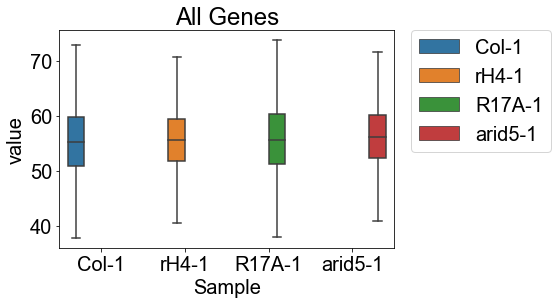

In [238]:
ax = sns.boxplot(x="Sample", y="value", hue="Sample", data=mdf, showfliers = False)
plt.title("All Genes")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
filename = "fuzziness_plots/all_genes"
path_to_file = os.path.join(save_path, filename)
plt.savefig(path_to_file,bbox_inches='tight')

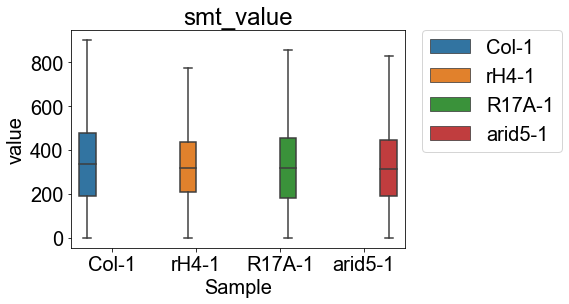

In [239]:
#smt_values
mdf = pd.melt(cdf, id_vars=['Sample'], value_vars=['smt_value'])
ax = sns.boxplot(x="Sample", y="value", hue="Sample", data=mdf, showfliers = False)
plt.title("smt_value")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### T-test

In [240]:
print("Col vs 68-18D:", ttest_ind(Col_1_data['fuzziness_score'], rH4_1_data['fuzziness_score'], equal_var=False))
print("13-6 vs 68-18D:", ttest_ind(rH4_1_data['fuzziness_score'], R17A_1_data['fuzziness_score'], equal_var=False))
print("Col vs 13-6:", ttest_ind(Col_1_data['fuzziness_score'], R17A_1_data['fuzziness_score'], equal_var=False))
print("Col vs arid5:", ttest_ind(Col_1_data['fuzziness_score'], arid5_1_data['fuzziness_score'], equal_var=False))

Col vs 68-18D: Ttest_indResult(statistic=1.6958711475126378, pvalue=0.08991053144911101)
13-6 vs 68-18D: Ttest_indResult(statistic=-23.343500300051705, pvalue=1.7005816818789182e-120)
Col vs 13-6: Ttest_indResult(statistic=-19.354447182847057, pvalue=1.9202893675451565e-83)
Col vs arid5: Ttest_indResult(statistic=-38.427416674209454, pvalue=0.0)


### Subsection by significant fuzziness scores

In [241]:
cdf_sig = cdf[cdf['fuzziness_log10pval']<-2]
cdf_sig.shape[0]

157918

In [242]:
cdf_sig.head()

,chr,start,end,smt_pos,smt_value,smt_log10pval,fuzziness_score,fuzziness_log10pval,center,Sample
12,Chr1,2162,2302,2232,96.046936,-8.871387e-31,44.836300,-2.044768,2232.0,Col-1
24,Chr1,4142,4282,4212,624.305086,-8.380245e+01,37.686169,-4.246448,4212.0,Col-1
53,Chr1,8522,8662,8592,464.226859,-3.127575e+01,42.391172,-2.655260,8592.0,Col-1
56,Chr1,9172,9312,9242,64.031291,-5.214574e-47,33.342166,-6.173494,9242.0,Col-1
57,Chr1,9392,9532,9462,384.187745,-1.350495e+01,35.483148,-5.271044,9462.0,Col-1


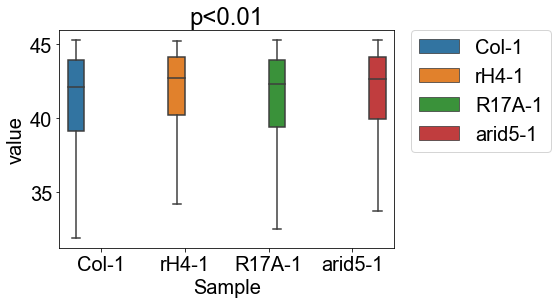

In [243]:
#Fuzziness Box Plot
mdf = pd.melt(cdf_sig, id_vars=['Sample'], value_vars=['fuzziness_score'])
ax = sns.boxplot(x="Sample", y="value", hue="Sample", data=mdf, showfliers = False)
plt.title("p<0.01")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
filename = "fuzziness_plots/log10_-2"
path_to_file = os.path.join(save_path, filename)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

In [244]:
Col_sig = cdf_sig[cdf_sig['Sample']=='Col-1']
rH4_sig = cdf_sig[cdf_sig['Sample']=='rH4-1']
R17A_sig = cdf_sig[cdf_sig['Sample']=='R17A-1']
arid5_sig = cdf_sig[cdf_sig['Sample']=='arid5-1']

In [245]:
print("Col vs 68-18D:", ttest_ind(Col_sig['fuzziness_score'], rH4_sig['fuzziness_score'], equal_var=False))
print("13-6 vs 68-18D:", ttest_ind(rH4_sig['fuzziness_score'], R17A_sig['fuzziness_score'], equal_var=False))
print("Col vs 13-6:", ttest_ind(Col_sig['fuzziness_score'], R17A_sig['fuzziness_score'], equal_var=False))
print("Col vs arid5:", ttest_ind(Col_sig['fuzziness_score'], arid5_sig['fuzziness_score'], equal_var=False))

Col vs 68-18D: Ttest_indResult(statistic=-23.451983599329555, pvalue=3.8242680705166425e-121)
13-6 vs 68-18D: Ttest_indResult(statistic=18.406502063742387, pvalue=1.7624339502096832e-75)
Col vs 13-6: Ttest_indResult(statistic=-4.650200933036694, pvalue=3.320500983990867e-06)
Col vs arid5: Ttest_indResult(statistic=-17.967580508826494, pvalue=5.454951806695477e-72)


### Protein-Coding Genes

In [246]:
# Save stats about the sample
Col_1_stats = statistics(Col_1_overlap, "Col-1")
rH4_1_stats = statistics(rH4_1_overlap, "rH4-1")
R17A_1_stats = statistics(R17A_1_overlap, "R17A-1")
arid5_1_stats = statistics(arid5_1_overlap, "arid5-1")

stats_df = Col_1_stats.append(rH4_1_stats, ignore_index=True)
stats_df = stats_df.append(R17A_1_stats, ignore_index=True)
stats_df = stats_df.append(arid5_1_stats, ignore_index=True)
stats_df

,sample,number_nucs,avg_smt_val,sem_smt_val,avg_fuzziness,sem_fuzziness
0,Col-1,384973,369.1151671435539,0.5214448600707855,55.80043384577936,0.011986869827292497
1,rH4-1,384743,348.56115122604797,0.5035178857165514,56.023508995334794,0.010085343447563762
2,R17A-1,382359,356.67870866310574,0.5972087103667101,56.336057001479574,0.011660070289065416
3,arid5-1,380844,349.70368682213643,0.4782587794250534,56.59275008004529,0.01028341291713641


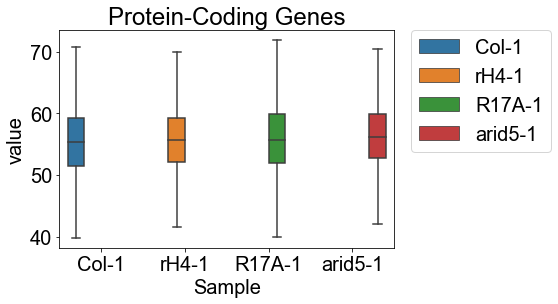

In [247]:
#Make boxplots of data
Col_1_overlap = Col_1_overlap.assign(Sample="Col-1")
rH4_1_overlap = rH4_1_overlap.assign(Sample="rH4-1")
R17A_1_overlap = R17A_1_overlap.assign(Sample="R17A-1")
arid5_1_overlap = arid5_1_overlap.assign(Sample="arid5-1")
cdf = pd.concat([Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap])
#Fuzziness
mdf = pd.melt(cdf, id_vars=['Sample'], value_vars=['fuzziness_score'])
#Plot
ax = sns.boxplot(x="Sample", y="value", hue="Sample", data=mdf, showfliers = False)
plt.title("Protein-Coding Genes")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
filename = "fuzziness_plots/Protein-Coding Genes"
path_to_file = os.path.join(save_path, filename)
plt.savefig(path_to_file,bbox_inches='tight')

In [248]:
print("Col vs 68-18D:", ttest_ind(Col_1_overlap['fuzziness_score'], rH4_1_overlap['fuzziness_score'], equal_var=False))
print("13-6 vs 68-18D:", ttest_ind(rH4_1_overlap['fuzziness_score'], R17A_1_overlap['fuzziness_score'], equal_var=False))
print("Col vs 13-6:", ttest_ind(Col_1_overlap['fuzziness_score'], R17A_1_overlap['fuzziness_score'], equal_var=False))
print("Col vs arid5:", ttest_ind(Col_1_overlap['fuzziness_score'], arid5_1_overlap['fuzziness_score'], equal_var=False))

Col vs 68-18D: Ttest_indResult(statistic=-14.2401518652133, pvalue=5.2336062665809306e-46)
13-6 vs 68-18D: Ttest_indResult(statistic=-20.27347884431245, pvalue=2.3332192734343145e-91)
Col vs 13-6: Ttest_indResult(statistic=-32.030072443864945, pvalue=5.864502806573842e-225)
Col vs arid5: Ttest_indResult(statistic=-50.167337371535524, pvalue=0.0)


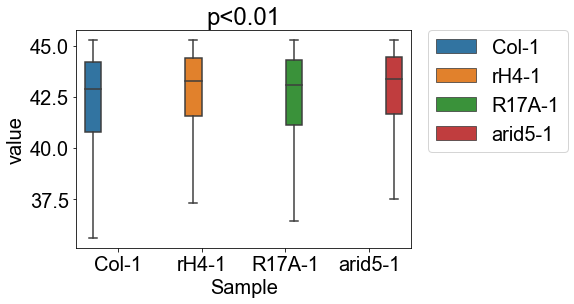

In [249]:
#p<0.01
cdf_sig = cdf[cdf['fuzziness_log10pval']<-2]
cdf_sig.shape[0]
#Fuzziness Box Plot
mdf = pd.melt(cdf_sig, id_vars=['Sample'], value_vars=['fuzziness_score'])
ax = sns.boxplot(x="Sample", y="value", hue="Sample", data=mdf, showfliers = False)
plt.title("p<0.01")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
filename = "fuzziness_plots/pc_log10_-2"
path_to_file = os.path.join(save_path, filename)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

In [250]:
# Plot percentage of fuzzy and well-positioned nucleosomes (set cutoff for fuzzy nucleosomes to >Col median)
Col_1_median = Col_1_overlap['fuzziness_score'].median()
Col_1_stdev = Col_1_overlap['fuzziness_score'].std()

In [251]:
# Make data frame showing % of fuzzy and well-positioned nucleosomes
Col_1_overlap['fuzzy_bool'] = Col_1_overlap['fuzziness_score']>Col_1_median+Col_1_stdev/1.5
rH4_1_overlap['fuzzy_bool'] = rH4_1_overlap['fuzziness_score']>Col_1_median+Col_1_stdev/1.5
R17A_1_overlap['fuzzy_bool'] = R17A_1_overlap['fuzziness_score']>Col_1_median+Col_1_stdev/1.5
arid5_1_overlap['fuzzy_bool'] = arid5_1_overlap['fuzziness_score']>Col_1_median+Col_1_stdev/1.5

In [252]:
def fuzzy_perc(df, name):
    nrow = len(df)
    num_fuzz = df['fuzzy_bool'].sum()
    num_nofuzz = nrow - num_fuzz
    perc_fuzz = 100*num_fuzz/nrow
    perc_nofuzz = 100*num_nofuzz/nrow
    d = {'genotype': [name], 'fuzzy_num': [num_fuzz], 'well-pos_num': [num_nofuzz], 'perc_fuzz': [perc_fuzz], 'perc_well-pos': [perc_nofuzz]}
    df = pd.DataFrame(data=d)
    return df

In [253]:
Col_perc = fuzzy_perc(Col_1_overlap, "Col-1")
rH4_perc = fuzzy_perc(rH4_1_overlap, "rH4-1")
R17A_perc = fuzzy_perc(R17A_1_overlap, "R17A-1")
arid5_perc = fuzzy_perc(arid5_1_overlap, "arid5-1")
fuzzy_percentages = pd.concat([Col_perc, rH4_perc, R17A_perc, arid5_perc])

In [254]:
fuzzy_percentages

,genotype,fuzzy_num,well-pos_num,perc_fuzz,perc_well-pos
0,Col-1,78515,306458,20.394937,79.605063
0,rH4-1,78257,306486,20.340071,79.659929
0,R17A-1,89525,292834,23.413860,76.586140
0,arid5-1,87213,293631,22.899928,77.100072


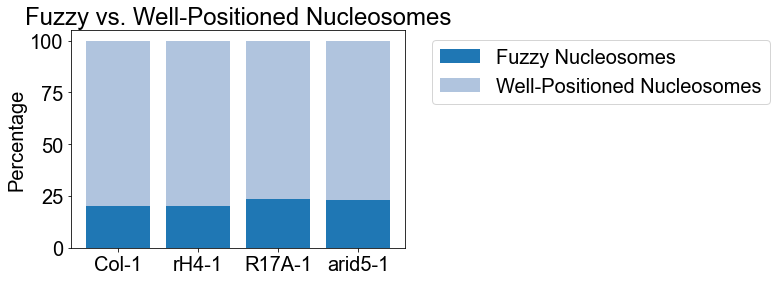

<Figure size 432x288 with 0 Axes>

In [255]:
# Plot data as bar plot
fig, ax = plt.subplots()

ax.bar(fuzzy_percentages['genotype'], fuzzy_percentages['perc_fuzz'], label='Fuzzy Nucleosomes')
ax.bar(fuzzy_percentages['genotype'], fuzzy_percentages['perc_well-pos'], label='Well-Positioned Nucleosomes', bottom=fuzzy_percentages['perc_fuzz'], color='lightsteelblue')

ax.set_ylabel('Percentage')
ax.set_title('Fuzzy vs. Well-Positioned Nucleosomes')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)

plt.show()

filename = "fuzziness_plots/percentage_fuzz_proteincoding"
path_to_file = os.path.join(save_path, filename)
plt.savefig(path_to_file,bbox_inches='tight')

## Subsection by certain genes

In [262]:
# Load DEG data
def deg_load(path, name):
    deg_file = pd.read_csv(path_to_file, sep='\t', header=None)
    deg_file.columns = [name]
    return deg_file

base_path = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_07_08 RNA-seq/Up_and_Down"

#chr11/17 down-regulated genes
filename = "chr11chr17_downreg.txt"
path_to_file = os.path.join(base_path, filename)
chr_downreg = deg_load(path_to_file, "Gene")
#chr11/17 up-regulated genes
filename = "chr11chr17_upreg.txt"
path_to_file = os.path.join(base_path, filename)
chr_upreg = deg_load(path_to_file, "Gene")

#R17A-2 down-regulated genes
filename = "13.9_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_9_downreg = deg_load(path_to_file, "Gene")
#R17A-2 up-regulated genes
filename = "13.9_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_9_upreg = deg_load(path_to_file, "Gene")

#R17A-1 down-regulated genes
filename = "13.6_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_6_downreg = deg_load(path_to_file, "Gene")
#R17A-1 up-regulated genes
filename = "13.6_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_6_upreg = deg_load(path_to_file, "Gene")

#arid5 down-regulated genes
filename = "arid5_downreg.txt"
path_to_file = os.path.join(base_path, filename)
arid5_downreg = deg_load(path_to_file, "Gene")
#arid5 up-regulated genes
filename = "arid5_upreg.txt"
path_to_file = os.path.join(base_path, filename)
arid5_upreg = deg_load(path_to_file, "Gene")

#rlt1/2 down-regulated genes
filename = "rlt12_downreg.txt"
path_to_file = os.path.join(base_path, filename)
rlt12_downreg = deg_load(path_to_file, "Gene")
#rlt1/2 up-regulated genes
filename = "rlt12_upreg.txt"
path_to_file = os.path.join(base_path, filename)
rlt12_upreg = deg_load(path_to_file, "Gene")

In [269]:
chr_deg = pd.merge(chr_downreg, chr_upreg, how="outer")
arid5_deg = pd.merge(arid5_downreg, arid5_upreg, how="outer")
rlt12_deg = pd.merge(rlt12_downreg, rlt12_upreg, how="outer")
x13_6_deg = pd.merge(x13_6_downreg, x13_6_upreg, how="outer")
x13_9_deg = pd.merge(x13_9_downreg, x13_9_upreg, how="outer")
x13_deg = pd.merge(x13_6_deg, x13_9_deg, how="outer")

In [295]:
arid5_rlt12_deg = pd.merge(arid5_deg, rlt12_deg, how="outer")
iswi_deg = pd.merge(arid5_rlt12_deg, chr_deg, how='outer')
all_deg_subset = pd.merge(iswi_deg, x13_deg, how="outer")

In [299]:
#Unaffected genes
# Load DEG data
def deg_load(path, name):
    deg_file = pd.read_csv(path_to_file, sep='\t', header=None)
    deg_file.columns = [name]
    return deg_file

base_path = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_07_08 RNA-seq/Unaffected"

#chr11/17 Unaffected genes
filename = "chrvsCol.txt"
path_to_file = os.path.join(base_path, filename)
chr_unaffected = deg_load(path_to_file, "Gene")

#arid5 Unaffected genes
filename = "arid5vsCol.txt"
path_to_file = os.path.join(base_path, filename)
arid5_unaffected = deg_load(path_to_file, "Gene")

#rlt1/2 Unaffected genes
filename = "rlt12vsCol.txt"
path_to_file = os.path.join(base_path, filename)
rlt12_unaffected = deg_load(path_to_file, "Gene")

#13.6 Unaffected genes
filename = "13.6vsCol.txt"
path_to_file = os.path.join(base_path, filename)
x13_6_unaffected = deg_load(path_to_file, "Gene")

#13.9 Unaffected genes
filename = "13.9vsCol.txt"
path_to_file = os.path.join(base_path, filename)
x13_9_unaffected = deg_load(path_to_file, "Gene")

In [297]:
x13_unaffected = pd.merge(s13_6_unaffected, s13_9_unaffected, how="outer")
arid5_rlt12_unaffected = pd.merge(arid5_unaffected, rlt12_unaffected, how="outer")
iswi_unaffected = pd.merge(arid5_rlt12_unaffected, chr_unaffected, how="outer")
all_unaffected = pd.merge(iswi_unaffected, x13_unaffected, how="outer")

In [292]:
# Function to plot box plots

def make_boxplots(Col_data, rH4_data, R17A_data, arid5_data, filename, gene_list=None):
    if gene_list is not None:
        Col_data = pd.merge(Col_data, gene_list, on="Gene")
        rH4_data = pd.merge(rH4_data, gene_list, on="Gene")
        R17A_data = pd.merge(R17A_data, gene_list, on="Gene")
        arid5_data = pd.merge(arid5_data, gene_list, on="Gene")
    
    Col_data = Col_data.assign(Sample="Col-1")
    rH4_data = rH4_data.assign(Sample="rH4-1")
    R17A_data = R17A_data.assign(Sample="R17A-1")
    arid5_data = arid5_data.assign(Sample="arid5-1")
    
    cdf = pd.concat([Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap])
    
    #Fuzziness
    mdf = pd.melt(cdf, id_vars=['Sample'], value_vars=['fuzziness_score'])
    
    #Plot
    plt.figure()
    ax = sns.boxplot(x="Sample", y="value", hue="Sample", data=mdf, showfliers = False)
    plt.title(filename)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    filename = "fuzziness_plots/"+filename
    path_to_file = os.path.join(save_path, filename)
    plt.savefig(path_to_file,bbox_inches='tight')

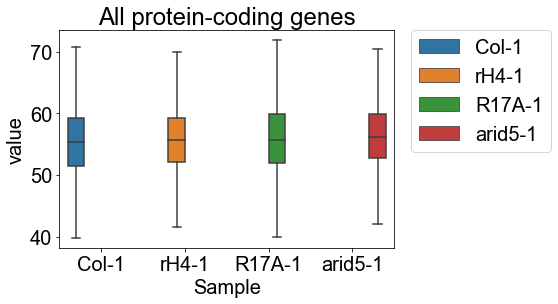

In [293]:
#All protein-coding genes
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "All protein-coding genes")

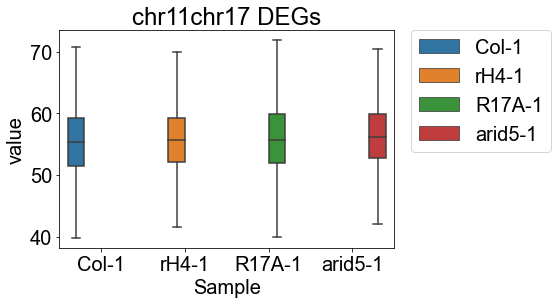

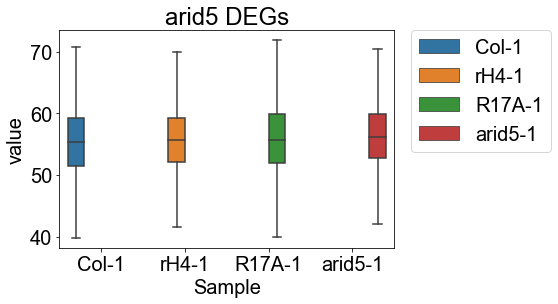

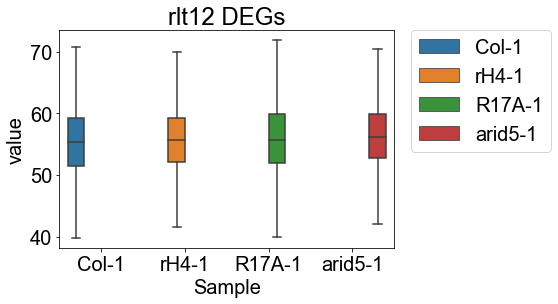

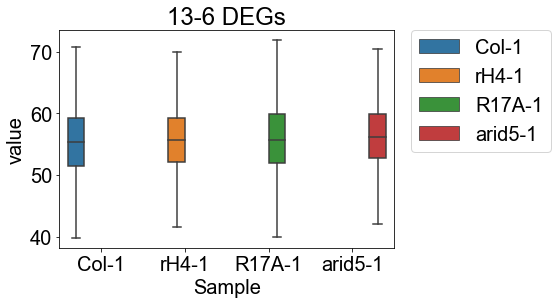

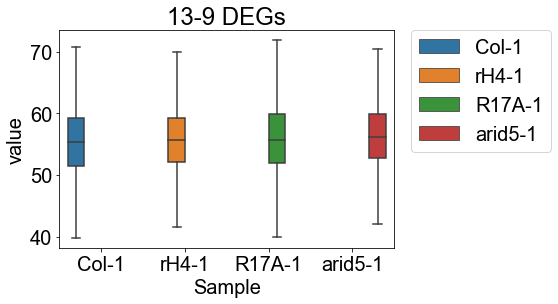

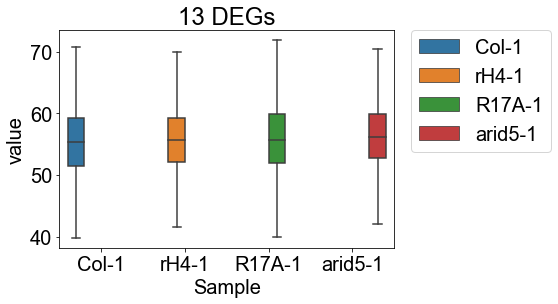

In [294]:
# DEGs
#chr11/17 DEG
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "chr11chr17 DEGs", gene_list=chr_deg)
#arid5 DEG
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "arid5 DEGs", gene_list=arid5_deg)
#rlt12 DEG
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "rlt12 DEGs", gene_list=rlt12_deg)
#13-6 DEG
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "13-6 DEGs", gene_list=x13_6_deg)
#13-9 DEG
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "13-9 DEGs", gene_list=x13_9_deg)
#13 DEG
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "13 DEGs", gene_list=x13_deg)

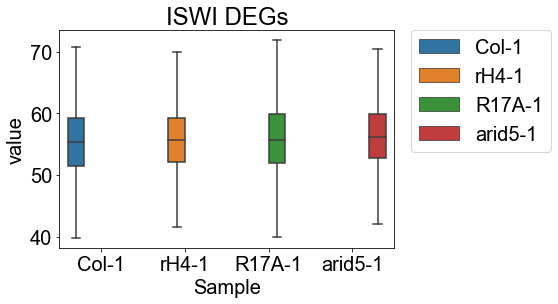

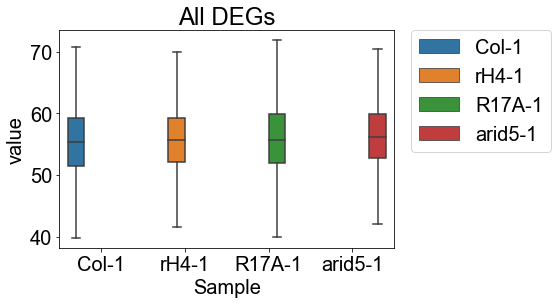

In [296]:
#ISWI DEG
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "ISWI DEGs", gene_list=iswi_deg)
#All DEG
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "All DEGs", gene_list=all_deg_subset)

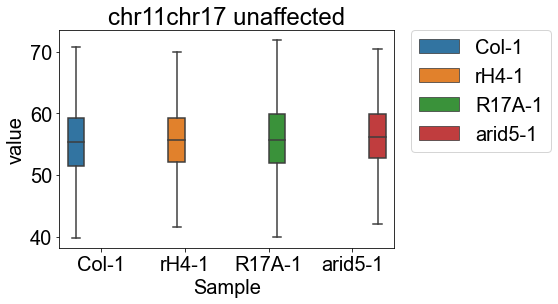

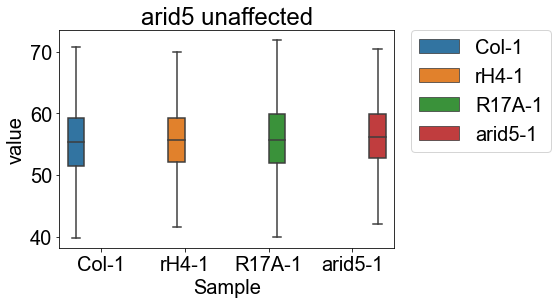

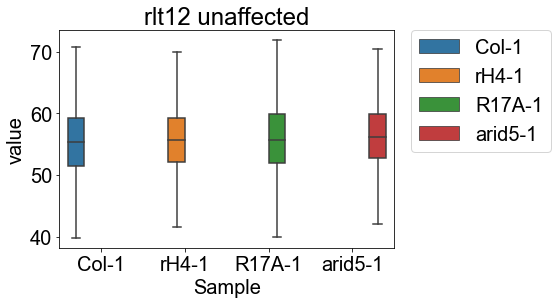

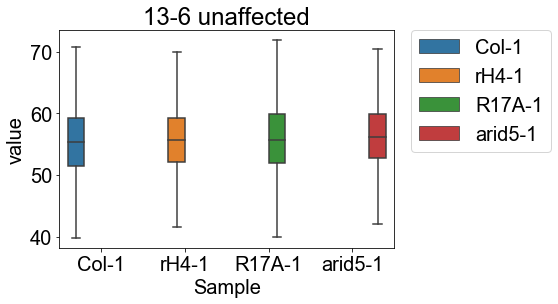

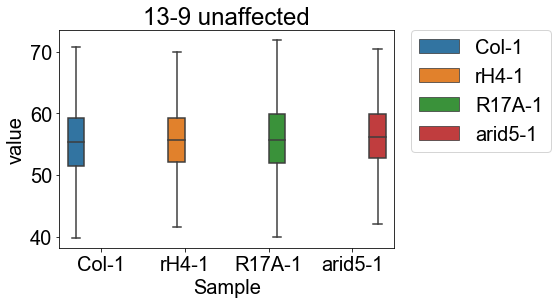

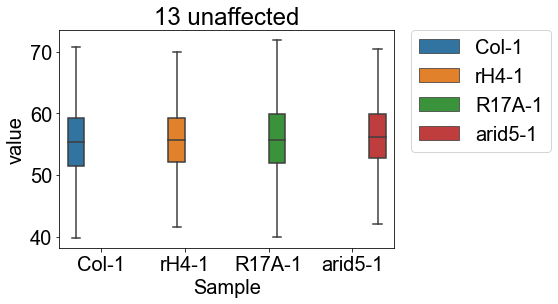

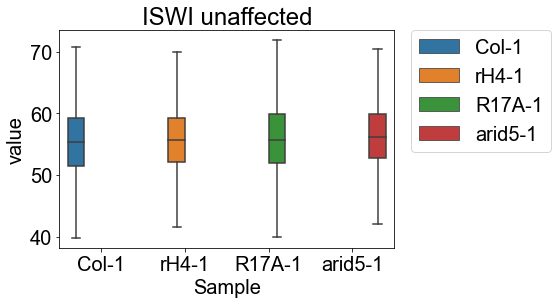

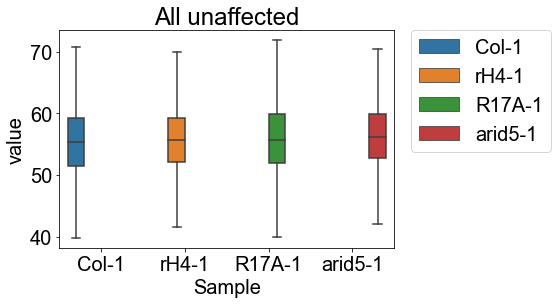

In [300]:
# Unaffected genes
#chr11/17
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "chr11chr17 unaffected", gene_list=chr_unaffected)
#arid5
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "arid5 unaffected", gene_list=arid5_unaffected)
#rlt12
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "rlt12 unaffected", gene_list=rlt12_unaffected)
#13-6
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "13-6 unaffected", gene_list=x13_6_unaffected)
#13-9
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "13-9 unaffected", gene_list=x13_9_unaffected)
#13
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "13 unaffected", gene_list=x13_unaffected)
#ISWI
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "ISWI unaffected", gene_list=iswi_unaffected)
#All
make_boxplots(Col_1_overlap, rH4_1_overlap, R17A_1_overlap, arid5_1_overlap, "All unaffected", gene_list=all_unaffected)